In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from empleados_package.funciones import PROJECT_ROOT_DIR, IMAGES_PATH, save_fig
from empleados_package.funciones import mapa_calor

In [3]:
df_completo = pd.read_csv("/home/miguel/Documents/Python/Empleados/data/empleados_limpio.csv", index_col = 0)
df_felices = pd.read_csv("/home/miguel/Documents/Python/Empleados/data/empleados_felices.csv", index_col = 0)
df_tristes = pd.read_csv("/home/miguel/Documents/Python/Empleados/data/empleados_tristes.csv", index_col = 0)

# Visualización de los datos categóricos y numéricos

Saving figure oi


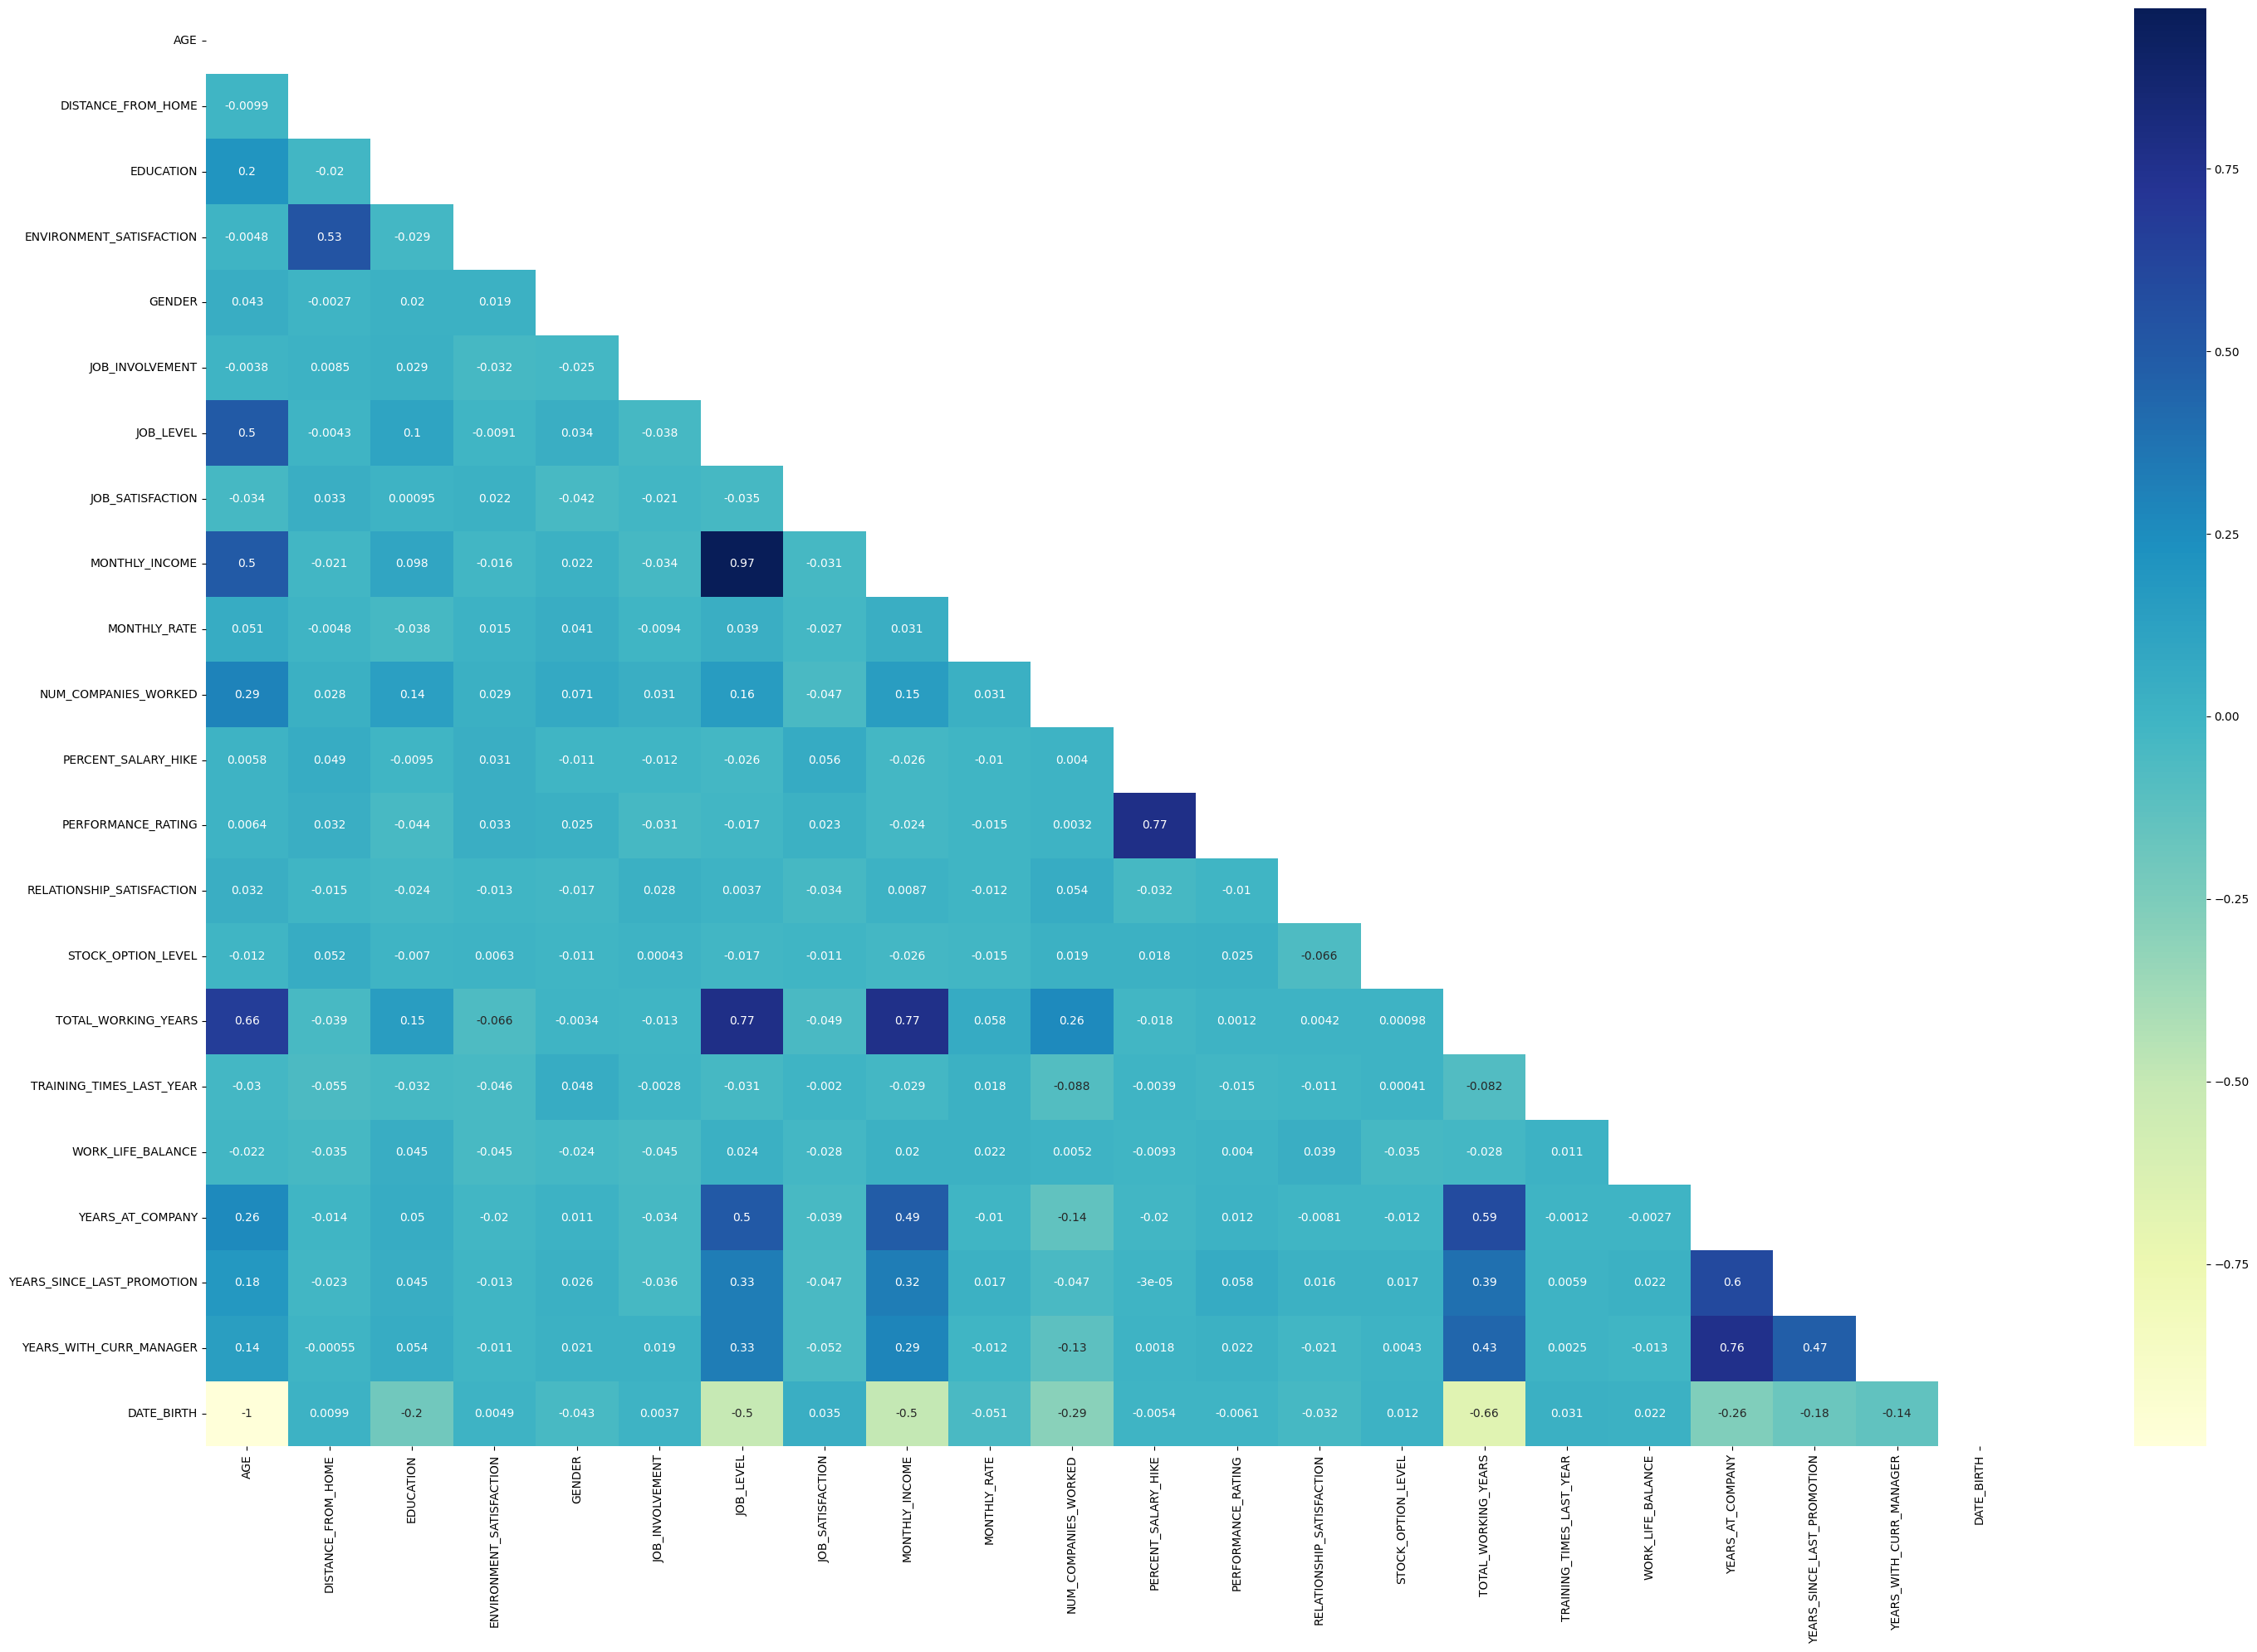

In [5]:
mapa_calor(df_felices, "oi")

In [ ]:
# Visualizacion de los datos numéricos
mask = np.triu(np.ones_like(df_types.select_dtypes(include='number').corr(), dtype = bool))
plt.figure(figsize=(30,20))
sns.heatmap(df_types.select_dtypes(include='number').corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True)
save_fig("corr_heatmap_1")
plt.show();

In [ ]:
# Visualización de datos numéricos
df_types.hist(bins = 50, figsize = (20,15))
save_fig("numerical_plots_1")
plt.show()

In [ ]:
# Visualizacion de los datos categóricos

fig, axes = plt.subplots(4, 2, figsize = (25,35))

axes = axes.flat

columnas_object = df_types.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df_types[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

save_fig("categorical_plots_1")  
fig.tight_layout();
